In [1]:
from matplotlib import pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [ ]:
df = read_csv("../output/น่าน พิษณุโลก 2558-2563.csv")
print(f"Size of data: {len(df)}")

X = df[["pH", "EC", "Temp"]]
y = df["DO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4096)

print(tuple(map(len, [X_train, X_test, y_train, y_test])))

Size of data: 79345
(71410, 7935, 71410, 7935)


In [3]:
pf = PolynomialFeatures(degree=3, include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [4]:
poly = LinearRegression()
poly.fit(X_train_pf, y_train)

LinearRegression()

In [5]:
print(f"Score train: {poly.score(X_train_pf, y_train)}")
print(f"Score test: {poly.score(X_test_pf, y_test)}")

Score train: 0.1670379014012422
Score test: 0.16547170925098986


In [6]:
sorted_indices = y_test.argsort()
X_test = X_test.iloc[sorted_indices]
y_test = y_test.iloc[sorted_indices]

y_pred = poly.predict(pf.fit_transform(X_test))

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 1.407954029591959
Root Mean Squared Error: 1.1865723870004556
R2 Score: 0.16547170925098964


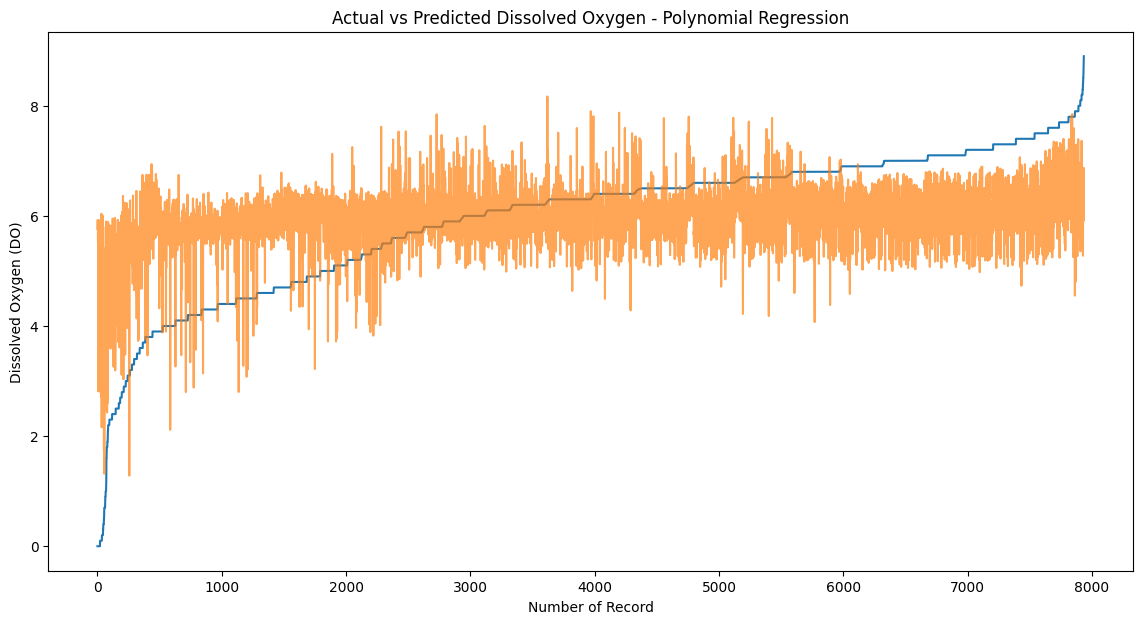

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label="Actual DO")
plt.plot(range(len(y_test)), y_pred, label="Predicted DO", alpha=0.7)
plt.xlabel("Number of Record")
plt.ylabel("Dissolved Oxygen (DO)")
plt.title("Actual vs Predicted Dissolved Oxygen - Polynomial Regression")
plt.show()